In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import scipy

# Any results you write to the current directory are saved as output.
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)

In [3]:
data = pd.read_csv('data/Accidents0514.csv')
data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

Mean = 234371.0
Std = 26102.69382923642
Var = 681350625.1428572
Size = 7


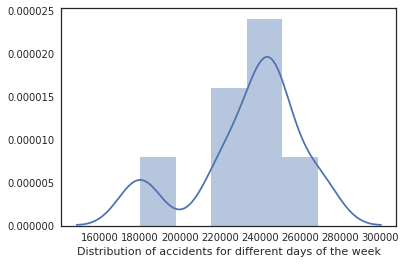

In [5]:
subset_data = data[['Accident_Index','Day_of_Week']]
accident_data_over_all_weeks = list(subset_data.groupby(['Day_of_Week']).count().Accident_Index)
mean = np.mean(accident_data_over_all_weeks)
std = np.std(accident_data_over_all_weeks)
var = np.var(accident_data_over_all_weeks)
print("Mean = "+str(mean))
print("Std = "+str(std))
print("Var = "+str(var))

standardized_accident_data_over_all_weeks = [(x-mean)/std for x in  accident_data_over_all_weeks]
size = len(standardized_accident_data_over_all_weeks)
print("Size = "+str(size))

sns.distplot(accident_data_over_all_weeks, axlabel='Distribution of accidents for different days of the week')
#plt.plot(standardized_accident_data_over_all_weeks)
#plt.show()


In [6]:
print("Null Hypothesis(H0): 'Total number of Accidents on each day in all the weeks over 10 years' follow a Normal Distribution.")
print("Alternate Hypothesis(H1): 'Total number of Accidents on each day in all the weeks over 10 years' do not follow a Normal Distribution.\n")

ks_test_statistic = scipy.stats.kstest(standardized_accident_data_over_all_weeks, 'norm')[0]
print("ks_test_statistic = "+str(ks_test_statistic))

#from ks table the critical value Dn,α for D7,0.05=0.48343
alpha = 0.05
critical_value = 0.48343
print("Critical value at α = 0.05 is " + str(critical_value)+"\n")

if ks_test_statistic > critical_value:
    print("Null Hypothesis is rejected at α = "+str(alpha))
    print("Therefore, 'Total number of Accidents on each day in all the weeks over 10 years' do not follow a Normal Distribution.\n")
else:
    print("Null Hypothesis is accepted at α = "+str(alpha))
    print("Therefore, 'Total number of Accidents on each day in all the weeks over 10 years' follow a Normal Distribution.\n")

Null Hypothesis(H0): 'Total number of Accidents on each day in all the weeks over 10 years' follow a Normal Distribution.
Alternate Hypothesis(H1): 'Total number of Accidents on each day in all the weeks over 10 years' do not follow a Normal Distribution.

ks_test_statistic = 0.239370694203
Critical value at α = 0.05 is 0.48343

Null Hypothesis is accepted at α = 0.05
Therefore, 'Total number of Accidents on each day in all the weeks over 10 years' follow a Normal Distribution.



<p>Since Sample Mean and Sample Varience are the MME estimators of True Mean and True Varience for a Normal Distribution:</p>
<p>$Mean_{MME}$ = 254379.0</p>
<p>$Var_{MME}$ = 805859829.429</p>